In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
M = pd.DataFrame()

temps = [300, 500, 700]

df_exp = pd.read_csv('../../26_de_abril/Post-PtPdCo-PDF.csv', sep = '\s+', header=None, names=['r','G(r)'])
df_exp = df_exp.replace('--',np.nan).dropna()
rest_df_exp = df_exp["G(r)"].iloc[1::2].astype(float)
rest_df_exp = rest_df_exp.reset_index(drop=True)
rest_df_exp.index += 1
M['exp'] = rest_df_exp

dx = 0.02

#M.index = M0['#r(A)']
M300 = pd.read_csv('p300_d2.txt', sep='\s+')
M500 = pd.read_csv('p500_d2.txt', sep='\s+')
M700 = pd.read_csv('p700_d2.txt', sep='\s+')
M['300 K'] = M300['G(r)']
M['500 K'] = M500['G(r)']
M['700 K'] = M700['G(r)']
M.index = (M.index + 1)*dx

for i in temps:
    a = M[M[f'{i} K']== max(M[f'{i} K'])].index[0]
    b = 0.29 #### Al parecer este es el originario de todo lo que yo estaba haciendo
    c = b/(float(M[f'{i} K'][a]))
    M[f'{i} K'] *= c
    rest = M['exp'] - M[f'{i} K']
    error = np.sum(rest**2)
    error_p = np.sqrt(error)*100/50
    print(f'Para {i} K el error es {error},y el error porcentual es {error_p}')

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
C:\Users\guill\AppData\Local\Temp\ipykernel_18028\2830923064.py:8: SyntaxWarning: invalid escape sequence '\s'
  df_exp = pd.read_csv('../../26_de_abril/Post-PtPdCo-PDF.csv', sep = '\s+', header=None, names=['r','G(r)'])
C:\Users\guill\AppData\Local\Temp\ipykernel_18028\2830923064.py:18: SyntaxWarning: invalid escape sequence '\s'
  M300 = pd.read_csv('p300_d2.txt', sep='\s+')
C:\Users\guill\AppData\Local\Temp\ipykernel_18028\2830923064.py:19: SyntaxWarning: invalid escape sequence '\s'
  M500 = pd.read_csv('p500_d2.txt', sep='\s+')
C:\Users\guill\AppData\Local\Temp\ipykernel_18028\28309

Para 300 K el error es 2.9540104575573367,y el error porcentual es 3.4374469930792166
Para 500 K el error es 2.0566965615316346,y el error porcentual es 2.8682374807757007
Para 700 K el error es 1.5855927666975063,y el error porcentual es 2.5184064538493436


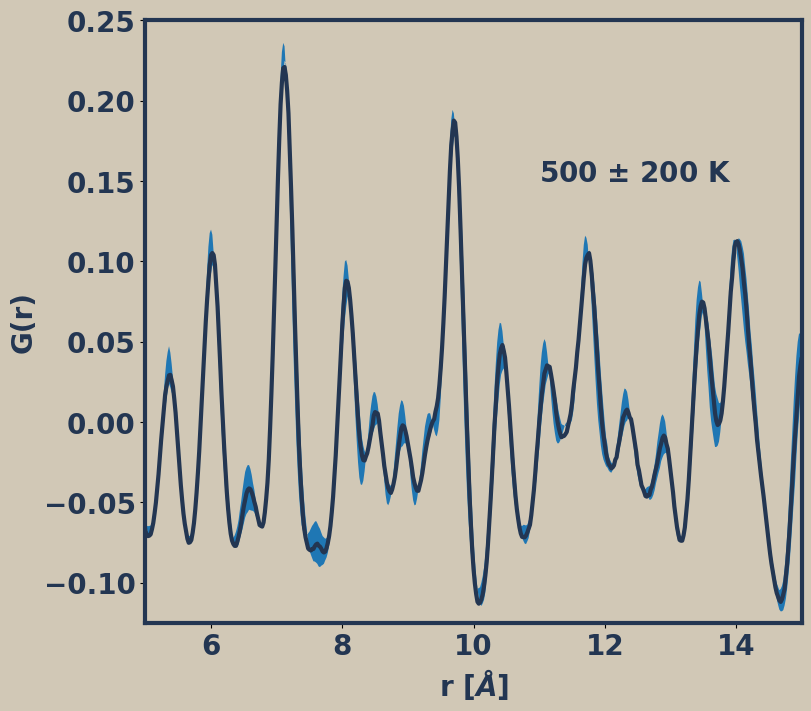

In [38]:
import matplotlib.pyplot as plt

blue = '#233652'
brown = '#33260D'
lightblue = '#B6C1D1'

fig, ax =plt.subplots(figsize=(8,7), layout='constrained', facecolor='#D1C8B6')

#ax.plot(M.index,M['exp'], label='Experimental', color='black')
#ax.plot(M.index, M['300 K'], label=blue, color=blue, lw=3)
ax.plot(M.index, M['500 K'], label='500 K', color=blue, lw=3)
#ax.plot(M.index, M['700 K'], label='700 K', color = blue, lw=3)
ax.fill_between(M.index, M['700 K'], M['300 K'], alpha=1)

ax.set_xlabel('r [$\\AA$]', color=blue, weight='bold')
ax.set_facecolor('#D1C8B6')
ax.set_xlim([5,15])
ax.set_ylim([-0.125,0.25])
ax.set_ylabel('G(r)', color=blue, weight='bold')

ax.text(*[11,0.15], '500 $\\pm$ 200 K', fontsize=20, rotation_mode='anchor', color = blue)
# ax.text(*[18,0.2], 'Sandwich', fontsize=20, rotation_mode='anchor', color = blue)
# ax.text(*[18,0.6], 'Janus', fontsize=20, rotation_mode='anchor', color = blue)




ax.tick_params(labelcolor=blue)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_color(blue)
    ax.spines[axis].set(linewidth = 3)



plt.rc('font', size=20, weight='bold')

#fpath = Path(mpl.get_data_path(), "C:/Users/guill/Downloads/Fira_Sans/FiraSans-Medium.ttf")

plt.rcParams['font.family'] = 'sans-serif'
plt.show()
